In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

## **Datasets**

In this project, we use iris dataset. The data set consists of 50 samples from each of three species of Iris. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [2]:
iris = load_iris()
X_iris = iris['data']
y_iris = iris['target']
print( X_iris.shape)
print( y_iris.reshape(-1,1).shape)

(150, 4)
(150, 1)


In [3]:
iris =load_iris()
 
target = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
df = pd.DataFrame(
    iris.data, 
    columns=iris.feature_names
    )
 

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Let's plot our data and see how it's look like 

Dimension of dataset space : 4
Correlations between data features :


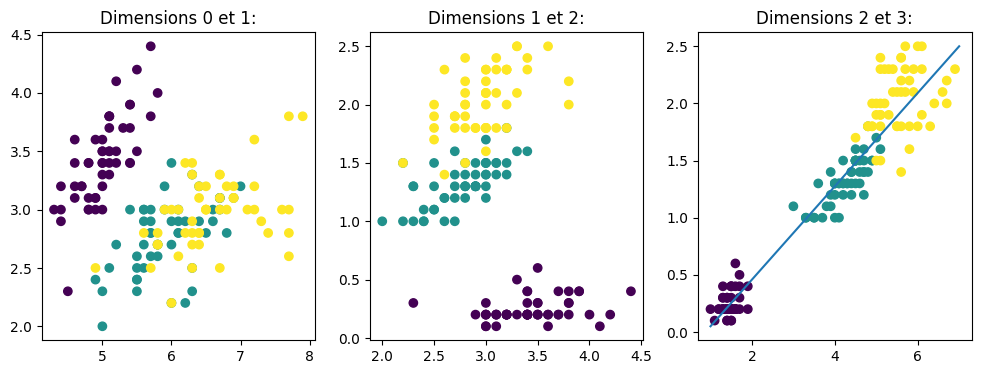

In [6]:
print("Dimension of dataset space : {}".format(X_iris.shape[1]))
print("Correlations between data features :")

plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.title("Dimensions 0 et 1:")
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.subplot(1, 3, 2)
plt.title("Dimensions 1 et 2:")
plt.scatter(X_iris[:, 1], X_iris[:, 3], c=y_iris)
plt.subplot(1, 3, 3)
plt.title("Dimensions 2 et 3:")
plt.scatter(X_iris[:, 2], X_iris[:, 3], c=y_iris)
plt.plot([1,7],[0.05,2.5])
plt.show()

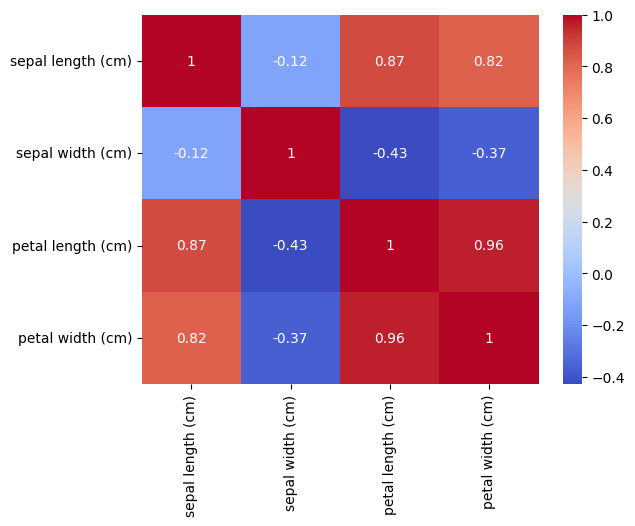

In [8]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

##Correlation between variables using correlation matrix:
From the correlation matrix above we observe that there is a reasonable
correlation among the variables and thus principal component analysis will be deployed to extract
features which form the potential classifiers of the flower species.


### 1.   **Data standardization by using this following formula**

 Compute the mean as follows for each variables as 
\begin{align*}
\text{Mean} &= \bar{X} = \frac{1}{n}\sum_{i=1}^{n} X_i \
\end{align*}
\begin{align*}
\text{Variance} &= \sigma^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i - \bar{X})^2
\end{align*}
Where $X_{i}$ represent the $i^{th}$ variable in the data set.
 To standardize a variable X using its mean ($\bar{X}$) and standard deviation ($\sigma$):

\begin{align*}
\text{Standardized }X &= \frac{X - \bar{X}}{\sigma}
\end{align*}

In this code, $\bar{X}$ represents the sample mean of the variable X, $\sigma$ represents the sample standard deviation of X, and X represents the original unstandardized variable. The resulting standardized variable has a mean of 0 and a standard deviation of 1.




In [ ]:
def mean(x): # np.mean(X, axis = 0)  
    return sum(x)/len(x)  

def std(x): # np.std(X, axis = 0)
    return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
    return (X - mean(X))/std(X)

X_std = Standardize_data(X_iris)

### 2.   compute the covariance matrix

Determine the covariance matrix of the data set

$\text{Cov}(X_i,X_j) = \frac{1}{n-1}\sum_{k=1}^{n}(X_{i}^{k}-\bar{X}i)(X_{j}^{k}-\bar{X}_j)$
\begin{equation*}
\mathbf{S} = \frac{1}{n-1}\mathbf{X}^\top\mathbf{X},
\end{equation*}

where $\mathbf{X}$ is the $n \times p$ matrix of standardized data, and $\mathbf{S}$ is the $p \times p$ sample covariance matrix. The $(i,j)$th entry of $\mathbf{S}$ is given by

\begin{equation*}
s_{i,j} = \frac{1}{n-1}\sum_{k=1}^{n} x_{k,i}x_{k,j},
\end{equation*}

where $x_{k,i}$ and $x_{k,j}$ are the $i$th and $j$th standardized variables, respectively, for the $k$th observation.


It is important to note that the covariance matrix is a square, postive definate ,symmetric matric of dimension p by p where p is the number of variables

In [ ]:
def covariance(x ,mu):
  n,d = x.shape
  cov= np.zeros((d,d))
  for i in range(d):
    for j in range(d):
      cov[i,j]= (1/n)*np.sum((x[:,i] - mu[i])*(x[:,j] - mu[j]).T)

  return cov

  # Easy way: cov= np.cov(x, rowvar=0) 
  
Cov_mat = covariance(X_std, mean(X_std))

### 3.   Compute the eigenvalue and eigenvector to our covariance matrix 
Compute eigen values and standardised eigen vectors of the covariance matrix
Let $A$ be the covariance matrix of a dataset $X$, then the eigenvalue equation is given by:

\begin{equation*}
A\mathbf{v} = \lambda \mathbf{v}
\end{equation*}

where $\mathbf{v}$ is the eigenvector of $A$ and $\lambda$ is the corresponding eigenvalue.

To find the eigenvalues and eigenvectors, we can solve this equation using the characteristic polynomial of $A$:

\begin{equation*}
\det(A - \lambda I) = 0
\end{equation*}

where $I$ is the identity matrix of the same size as $A$. Solving for $\lambda$ gives the eigenvalues, and substituting each eigenvalue back into the equation $A\mathbf{v} = \lambda \mathbf{v}$ gives the corresponding eigenvectors.


In [ ]:
from numpy.linalg import eig

eigen_values, eigen_vectors = np.linalg.eig(Cov_mat) # return eigen values and eigen vectors
print(eigen_values)
print(eigen_vectors)

[2.91849782 0.91403047 0.14675688 0.02071484]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


*   rank the eigenvalues and their associated eigenvectors in decreasing order

In [ ]:
print(eigen_values)
idx = eigen_values.argsort()[::-1]# Return the descending order of eigen values
print(idx)
eigen_values_sorted = eigen_values[idx]
eigen_vectors_sorted = eigen_vectors[:,idx]
print(eigen_vectors_sorted)

[2.91849782 0.91403047 0.14675688 0.02071484]
[0 1 2 3]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]



######   choose the q component with is the hyperparameter of our model  

*   PCA for visualization the value of q should be 2 on two dimension and 3 for tre dimension 
*   Retain at least $x= 58%$ of our total variance capturing by all principal component



Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


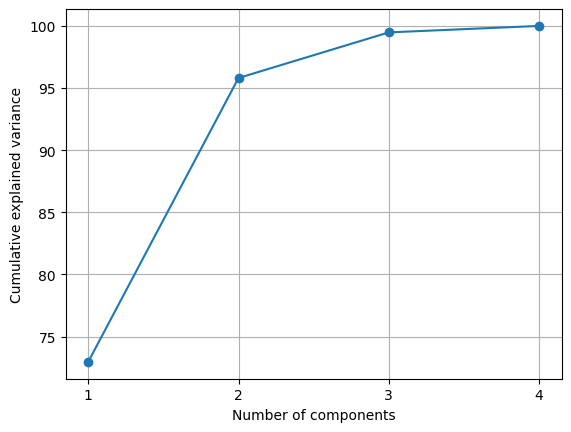

In [ ]:
eig_vals_total = sum(eigen_values)
explained_variance = [(i / eig_vals_total)*100 for i in eigen_values_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,X_iris.shape[1]+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,X_iris.shape[1]+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.grid()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=4)

#fit PCA model to data
pca_fit = pca.fit(X_std)

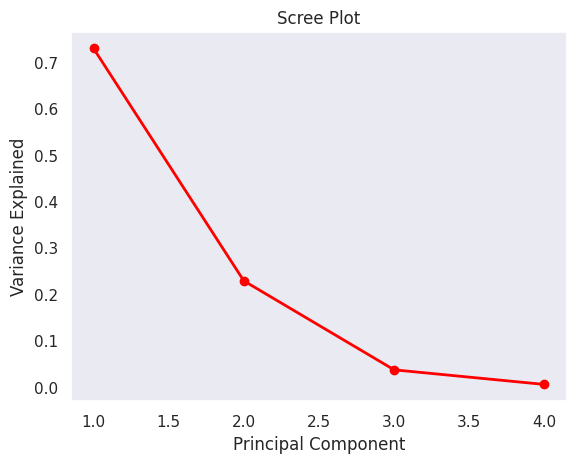

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()


*  Kaiser'rule witch keep all the components with eigenvalues greater than 1.

In [ ]:
num_components = 2#
# Basis of Principal Components
V = eigen_vectors[:, :num_components]
print(V)

[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [ ]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.to_csv("iris_download.csv", index = False)
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = df.loc[:, 'sepal_len':'petal_wid'].values
y = df.loc[:, 'class'].values

pca = PCA() #If we do not specify how many components, all are included
X_r = pca.fit(X).transform(X)

In [ ]:
target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


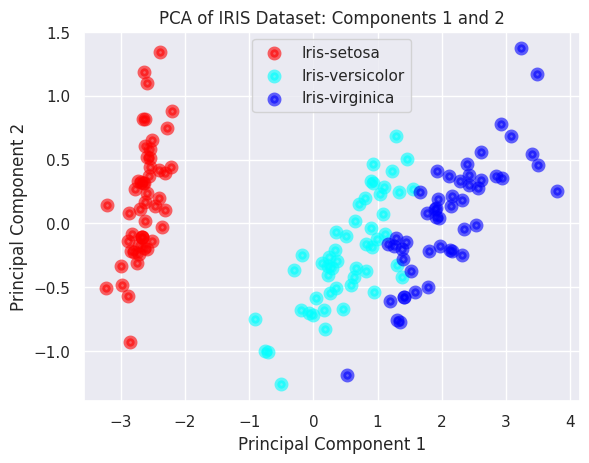

In [ ]:
def pca_scatter(pca1, pca2):
    plt.close
    plt.figure()
    colors = ['red', 'cyan', 'blue']
    lw = 4


    for color, target_name in zip(colors, target_names):
        plt.scatter(X_r[y == target_name, pca1], X_r[y == target_name, pca2], color=color, alpha=.6, lw=lw,
                    label=target_name)
    plt.legend(loc='upper center', shadow=False, scatterpoints=1)
    plt.title('PCA of IRIS Dataset: Components {} and {}'.format(pca1+1, pca2+1))
    plt.xlabel('Principal Component {}'.format(pca1+1))
    plt.ylabel('Principal Component {}'.format(pca2+1))
    plt.show()

pca_scatter(0, 1)

### 5. project the data xi in the obtained q-dimensional space

In [ ]:
X_proj =X_std@V
X_proj.shape

(150, 2)

Let us  define the sqrt dia_matrix which correspond the highter eigenvalue 

In [ ]:
eigen_values_chose = eigen_values[:2]
dia_matrix = np.diag(eigen_values_chose)
dia_matrix.shape , V.shape
a = np.sqrt(dia_matrix)
loading = V@a

In [ ]:
class PCAclass:
    
    def __init__(self, n_components):
        self.n_components = n_components   
        
    def fit(self, X):
        # Standardize data 
        
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        X_std = (X - self.mean) / self.std
        
        # Decomposition of eigenvalue and eigenvector of covariance matrix       
        cov_mat = np.cov(X_std, rowvar=0)
        eigen_values, eigen_vectors = np.linalg.eig(cov_mat) 
        
        # sorted     
        idx = eigen_values.argsort()[::-1]     
        eigen_values_sorted = eigen_values[idx]
        eigen_vectors_sorted = eigen_vectors[:, idx]
        
        
        # Basis of Principal Components
        self.components = eigen_vectors_sorted[:, :self.n_components]
        X_proj = X_std.dot(self.components)

        
        return X_proj

In [ ]:

model = PCAclass(n_components=2)
X_proj= model.fit(X_iris)

print('Transformed data', X_proj.shape)

Transformed data (150, 2)


In [ ]:
principa_df = pd.DataFrame(X_proj, columns=['PC1','PC2'] )
principa_df = pd.concat([principa_df,pd.DataFrame(y_iris)],axis=1)
principa_df

,PC1,PC2,0
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0
...,...,...,...
145,1.870503,-0.386966,2
146,1.564580,0.896687,2
147,1.521170,-0.269069,2
148,1.372788,-1.011254,2


Loading matrix with our function

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_iris = StandardScaler().fit_transform(X_iris)
pca2 = PCA(n_components=2)
principalC = pca2.fit_transform(X_iris)

loadings = pca2.components_.T * np.sqrt(pca2.explained_variance_)


loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=iris.feature_names)
print(loading_matrix)
#print(loadings)

                        PC1       PC2
sepal length (cm)  0.893151  0.362039
sepal width (cm)  -0.461684  0.885673
petal length (cm)  0.994877  0.023494
petal width (cm)   0.968212  0.064214


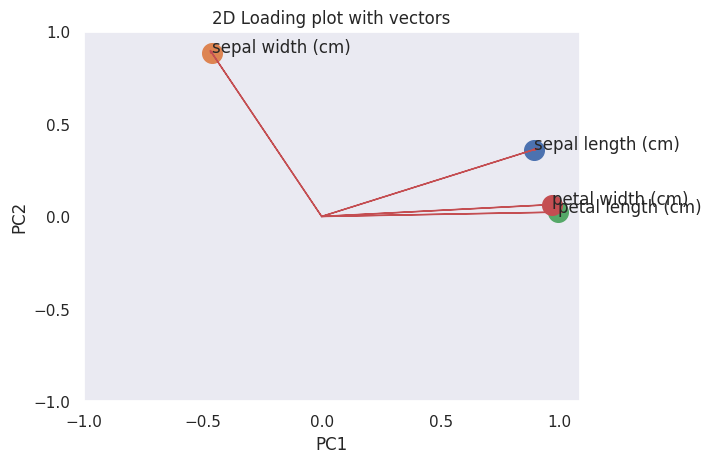

In [ ]:
# Get the loadings of x and y axes
xs = loadings[:, 0]
ys = loadings[:, 1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(iris.feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-1, 1, num=5)
yticks = np.linspace(-1, 1, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.grid()
plt.show()


##Let's confirm our PCs result using Sklearn

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
X_iris = StandardScaler().fit_transform(X_iris)

In [ ]:
pca2 = PCA(n_components=2)

In [ ]:
principalC = pca2.fit_transform(X_iris)

In [ ]:
princD = pd.DataFrame(data = principalC, columns=['PC1','PC2'])


In [ ]:
princD

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254
